In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

#,'^BVSP'

In [2]:
W=pd.read_csv('Acoes_ibov.csv')
W['^BVSP']=''
# W.columns
#'VIIA3.SA'

In [3]:
#ibovespa_tickers=list(W.columns)
inicio= "2021-01-01"
fim= "2022-12-31"
carteira = ['TRPL3.SA','BBAS3.SA','KLBN11.SA','PETR3.SA']
# carteira
# q=list(ibovespa_tickers[1:])
# q
data = yf.download(carteira, start=inicio, end=fim )['Adj Close']
# data= pd.read_csv('Acoes_ibov-Copy1.csv')
# data.set_index("Date",inplace=True)
#ibovespa_tickers[:['VIIA3.SA','^BVSP']]

[*********************100%%**********************]  4 of 4 completed


In [4]:
data
#ibovespa_tickers[1:48]

BBAS3.SA  KLBN11.SA   PETR3.SA   TRPL3.SA
Date                                                  
2021-01-04  30.328735  22.589081  12.135617  25.309877
2021-01-05  30.014072  22.432997  12.505857  24.560658
2021-01-06  30.699875  22.857897  12.649839  25.103197
2021-01-07  31.918184  24.071898  13.020077  25.060137
2021-01-08  32.103764  25.051769  12.995397  25.275433
...               ...        ...        ...        ...
2022-12-23  32.831257  18.423616  23.480459  28.907261
2022-12-26  32.784729  18.299259  23.406466  29.737597
2022-12-27  31.695940  18.567101  23.562674  28.270000
2022-12-28  32.263592  18.968863  23.431129  28.930000
2022-12-29  32.319435  19.093216  23.052944  28.950001

[497 rows x 4 columns]

In [5]:
log_retorno=np.log(data).diff()
log_retorno_medio_anual=log_retorno.mean()*252


In [6]:
covariancia=log_retorno.cov()*252
#ovariancia

In [7]:
randomlist = np.random.randint(1,101, size=(10000,len(data.columns)))
randomlist= randomlist / np.sum(randomlist, axis=1, keepdims=True)
z= pd.DataFrame(randomlist, columns=data.columns)
z['Retorno_da_carteira']=''
z['Risco_da_carteira']=''

In [8]:
z

BBAS3.SA  KLBN11.SA  PETR3.SA  TRPL3.SA Retorno_da_carteira  \
0     0.062992   0.157480  0.133858  0.645669                       
1     0.338164   0.231884  0.246377  0.183575                       
2     0.020101   0.336683  0.175879  0.467337                       
3     0.322957   0.194553  0.210117  0.272374                       
4     0.294737   0.298246  0.210526  0.196491                       
...        ...        ...       ...       ...                 ...   
9995  0.192691   0.239203  0.312292  0.255814                       
9996  0.250847   0.322034  0.132203  0.294915                       
9997  0.242009   0.164384  0.242009  0.351598                       
9998  0.438914   0.352941  0.153846  0.054299                       
9999  0.091463   0.384146  0.152439  0.371951                       

     Risco_da_carteira  
0                       
1                       
2                       
3                       
4                       
...                ...  
9995                    
9996                    
9997                    
9998                    
9999                    

[10000 rows x 6 columns]

In [9]:
for i in range(randomlist.shape[0]):
    z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
    z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Risco_da_carteira'][i]= np.sqrt(np.dot(randomlist[i].T,np.dot(covariancia,randomlist[i])))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Retorno_da_carteira'][i]= np.exp(np.sum(randomlist[i]*log_retorno_medio_anual))
C:\Users\bruno\AppData\Local\Temp\ipykernel_17948\217748078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

In [10]:
z.loc[z['Risco_da_carteira']==z['Risco_da_carteira'].min()]


BBAS3.SA  KLBN11.SA  PETR3.SA  TRPL3.SA Retorno_da_carteira  \
4290  0.232932   0.381526  0.060241  0.325301            1.016921   

     Risco_da_carteira  
4290          0.182759

Text(0, 0.5, 'Expectativa de Retornos')

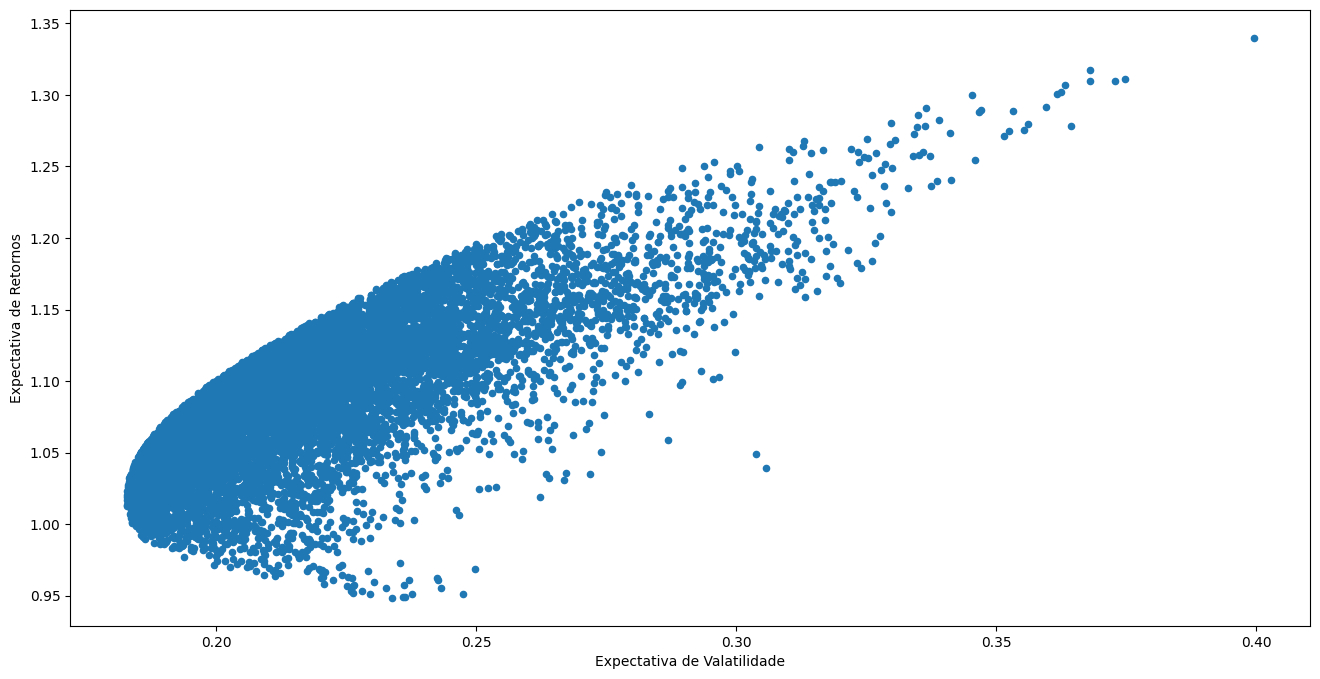

In [11]:
z.plot(x='Risco_da_carteira', y='Retorno_da_carteira', kind='scatter',figsize=(16,8))
plt.xlabel('Expectativa de Valatilidade')
plt.ylabel('Expectativa de Retornos')